In [1]:
#IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOADING THE DATASET
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

So we have dataset in which there are 614 rows and 13 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we have all types of data types in the datset.

In [7]:
# Data Analysis and Visualization
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This column shows the statistical values for the numerical data like mean,standard deviation and percentiles,minimum and maximum.

In [8]:
#checking for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So,it is obsetved from above observations that there are null values inside the dataset. so we need to replace the missing values with nan. we can also observe null values with visualization library seaborn.

<AxesSubplot:>

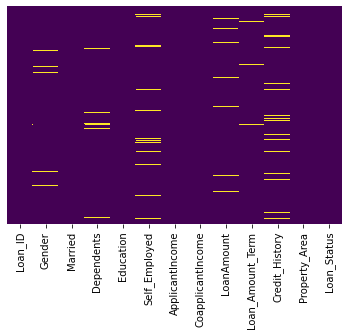

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df=df.dropna()

So, here we have dropped the null values and saved the data into the same dataframe which is df.

<AxesSubplot:>

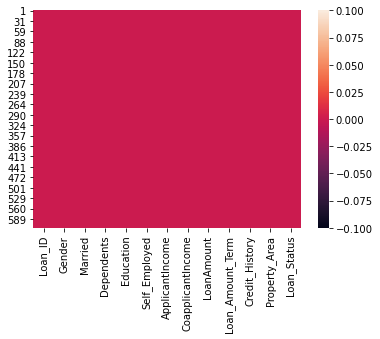

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<AxesSubplot:>

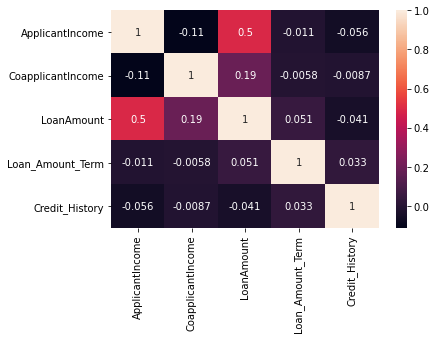

In [13]:
sns.heatmap(df.corr(),annot=True)

So from the above graph we can observe that there is positive corelation between ApplicantIncome and LoanAmount.

No multicolinearity inside the data.

In [14]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

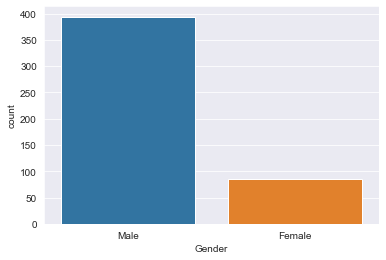

In [15]:
#data visualization
sns.set_style('darkgrid')
sns.countplot(x='Gender',data=df)

In [17]:
df.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

observation

Male count is more than female for loan application.

<AxesSubplot:xlabel='Married', ylabel='count'>

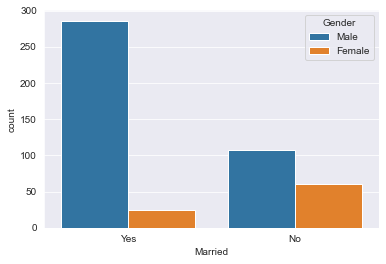

In [19]:
sns.set_style('darkgrid')
sns.countplot(x='Married',hue='Gender',data=df)

observation

Married male applicants have applied more for loan.

Unmarried female applicants have applied for loan.

<AxesSubplot:xlabel='Gender', ylabel='count'>

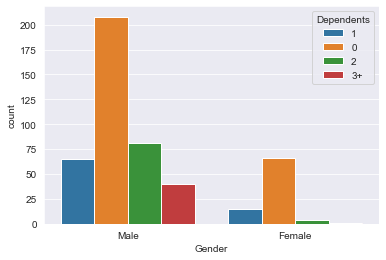

In [21]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Dependents',data=df)

observation

Male applicants have more number of dependents than female.

<AxesSubplot:xlabel='Gender', ylabel='count'>

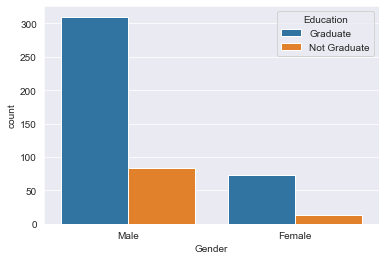

In [22]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Education',data=df)

observation

Graduate males have applied for loan than graduate females.

<AxesSubplot:xlabel='Married', ylabel='count'>

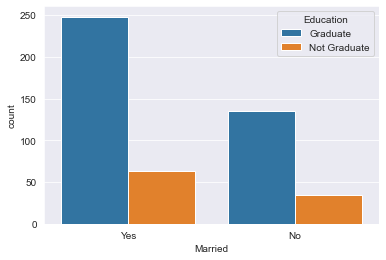

In [23]:
sns.set_style('darkgrid')
sns.countplot(x='Married',hue='Education',data=df)

observation

Mostly maximum married applicants who are graduate applied for loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

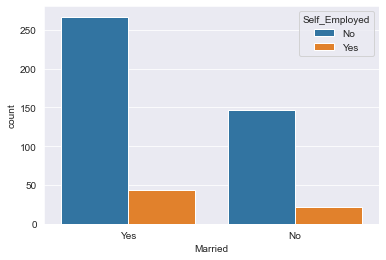

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='Married',hue='Self_Employed',data=df)

observation

Applicants who are not self employed and are married applied for loan.

<AxesSubplot:xlabel='Gender', ylabel='count'>

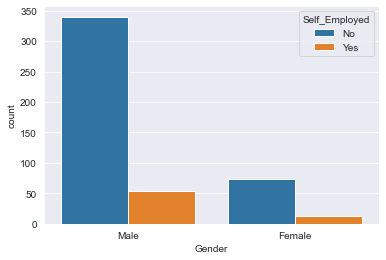

In [25]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Self_Employed',data=df)

observation

Applicants who are not self employed and are male applied for loan.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

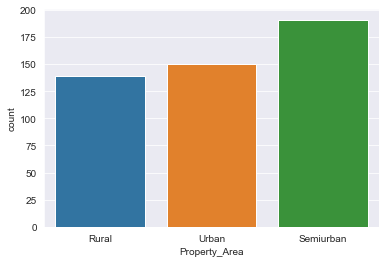

In [26]:
sns.set_style('darkgrid')
sns.countplot(x='Property_Area',data=df)

observation

Applicants who applied for loan are moslty from semiurban area.

<AxesSubplot:xlabel='Gender', ylabel='count'>

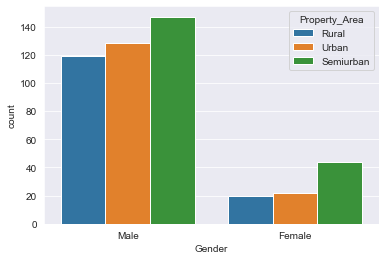

In [27]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Property_Area',data=df)

observation

Applicants who applied for loan are moslty from semiurban area and are male.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

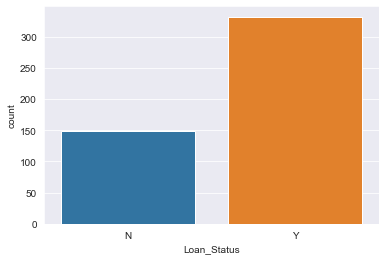

In [28]:
sns.set_style('darkgrid')
sns.countplot(x='Loan_Status',data=df)

observation

Most of the applicants have got the loan apporval.

<AxesSubplot:xlabel='Gender', ylabel='count'>

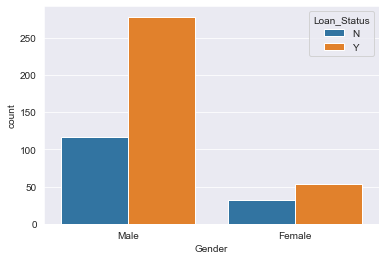

In [29]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Loan_Status',data=df)

observation

Maximum male applicants have got the laon approval.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

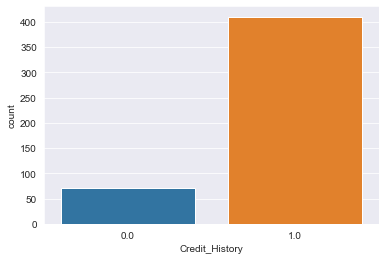

In [42]:
sns.set_style('darkgrid')
sns.countplot(x='Credit_History',data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

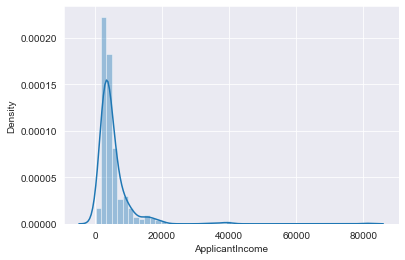

In [35]:
sns.distplot(df['ApplicantIncome'])

observation

Applicant income who have applied for laon is mostly in the range from 5-10k

In [36]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x11b98f7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x11b98fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b62a970>],
 'medians': [<matplotlib.lines.Line2D at 0x11bbff580>],
 'fliers': [<matplotlib.lines.Line2D at 0x11bbff8e0>],
 'means': []}

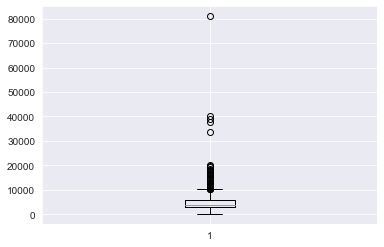

In [37]:
#checking outliers
plt.boxplot(df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11bc79ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x11bce41c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11bc79760>],
 'medians': [<matplotlib.lines.Line2D at 0x11bce4880>],
 'fliers': [<matplotlib.lines.Line2D at 0x11bce4be0>],
 'means': []}

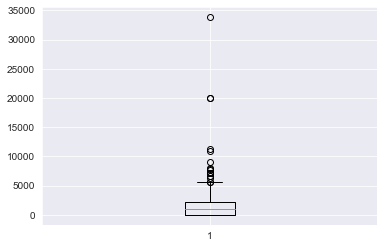

In [38]:
plt.boxplot(df['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11bdb38b0>,
 'caps': [<matplotlib.lines.Line2D at 0x11bdb3f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x11bdb3550>],
 'medians': [<matplotlib.lines.Line2D at 0x11bdc0670>],
 'fliers': [<matplotlib.lines.Line2D at 0x11bdc09d0>],
 'means': []}

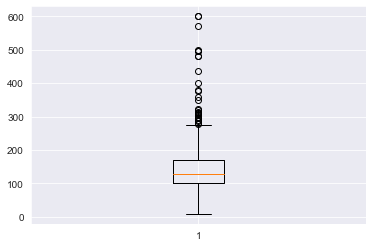

In [39]:
plt.boxplot(df['LoanAmount'])

we can see above that outliers are present in some columns so we will remove them by using zscore.

In [44]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
df['Loan_ID']=lencode.fit_transform(df['Loan_ID'])
df['Gender']=lencode.fit_transform(df['Gender'])
df['Married']=lencode.fit_transform(df['Married'])
df['Dependents']=lencode.fit_transform(df['Dependents'])
df['Education']=lencode.fit_transform(df['Education'])
df['Self_Employed']=lencode.fit_transform(df['Self_Employed'])
df['Property_Area']=lencode.fit_transform(df['Property_Area'])
df['Loan_Status']=lencode.fit_transform(df['Loan_Status'])

We have encoded the all categorical data into nuemrical data. 

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [46]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [48]:
#REMOVING OUTLIERS USING ZSCORE
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72844612, 0.46719815, 0.73716237, ..., 0.41319694, 1.31886834,
        1.49774605],
       [1.72122923, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       [1.71401233, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       ...,
       [1.71401233, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       [1.72122923, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       [1.72844612, 2.14041943, 1.35655324, ..., 2.42015348, 0.02954695,
        1.49774605]])

looking the code and the output above,it is difficult to say which data pointer is an oulier.lets try and define a threshold to identify an outlier.

In [49]:
threshold=3
print(np.where(z>3))

(array([  8,  12,  54,  75,  98, 120, 120, 137, 137, 142, 144, 187, 205,
       220, 244, 286, 312, 319, 326, 347, 380, 386, 409, 410, 426, 438,
       450, 454, 457, 471]), array([7, 9, 9, 9, 9, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 8, 7, 6, 7, 6, 8, 9,
       8, 8, 9, 8, 9, 7, 9, 8]))


In [50]:
#array 1 is holding the row number and array two is holding the column
z[8][7]

3.589688470140909

In [51]:
z[12][9]

3.408579684264412

In [52]:
#IQR SCORE(INTERQUARTILE RANGE)
Q1=df.quantile(0.25)
Q1

Loan_ID               119.75
Gender                  1.00
Married                 0.00
Dependents              0.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2898.75
CoapplicantIncome       0.00
LoanAmount            100.00
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           0.00
Loan_Status             0.00
Name: 0.25, dtype: float64

In [53]:
Q3=df.quantile(0.75)
Q3

Loan_ID               359.25
Gender                  1.00
Married                 1.00
Dependents              2.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      5852.50
CoapplicantIncome    2253.25
LoanAmount            170.00
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           2.00
Loan_Status             1.00
Name: 0.75, dtype: float64

In [54]:
IQR=Q3-Q1
IQR

Loan_ID               239.50
Gender                  0.00
Married                 1.00
Dependents              2.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2953.75
CoapplicantIncome    2253.25
LoanAmount             70.00
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

In [55]:
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [56]:
df.shape

(480, 13)

In [57]:
df_new.shape

(452, 13)

In [59]:
#Splitting the independent variables and target
x=df_new.drop('Loan_Status',axis=1)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [60]:
y=df_new['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 452, dtype: int64

In [91]:
#training and testing of model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=146)

In [92]:
xtrain.shape

(361, 12)

In [93]:
ytrain.shape

(361,)

In [94]:
xtest.shape

(91, 12)

In [95]:
ytest.shape

(91,)

In [96]:
#APPLYING ML ALGORITHMS
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg=lg.predict(xtest)
print(accuracy_score(ytest,predlg))
print(classification_report(ytest,predlg))
print(confusion_matrix(ytest,predlg))

0.8571428571428571
              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.85      0.99      0.91        69

    accuracy                           0.86        91
   macro avg       0.88      0.72      0.76        91
weighted avg       0.86      0.86      0.84        91

[[10 12]
 [ 1 68]]


In [97]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
predrfc=rfc.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(classification_report(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))

0.8461538461538461
              precision    recall  f1-score   support

           0       0.72      0.59      0.65        22
           1       0.88      0.93      0.90        69

    accuracy                           0.85        91
   macro avg       0.80      0.76      0.78        91
weighted avg       0.84      0.85      0.84        91

[[13  9]
 [ 5 64]]


In [98]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb.score(xtrain,ytrain)
predgnb=gnb.predict(xtest)
print(accuracy_score(ytest,predgnb))
print(confusion_matrix(ytest,predgnb))
print(classification_report(ytest,predgnb))

0.8791208791208791
[[12 10]
 [ 1 68]]
              precision    recall  f1-score   support

           0       0.92      0.55      0.69        22
           1       0.87      0.99      0.93        69

    accuracy                           0.88        91
   macro avg       0.90      0.77      0.81        91
weighted avg       0.88      0.88      0.87        91



In [99]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.7362637362637363
[[12 10]
 [14 55]]
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        22
           1       0.85      0.80      0.82        69

    accuracy                           0.74        91
   macro avg       0.65      0.67      0.66        91
weighted avg       0.75      0.74      0.74        91



In [100]:
#SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(classification_report(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))

0.7582417582417582
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.76      1.00      0.86        69

    accuracy                           0.76        91
   macro avg       0.38      0.50      0.43        91
weighted avg       0.57      0.76      0.65        91

[[ 0 22]
 [ 0 69]]


Among all the algorithms Gaussian Nb gives the highest accuracy of 88%. so we will go with Gaussian NB algorithm.

In [102]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x,y,cv=5)
print('cross validation score of logistic regression is',scr.mean())

cross validation score of logistic regression is 0.7965079365079365


In [103]:
scr2=cross_val_score(rfc,x,y,cv=5)
print('cross validation score of Random forest classifier is',scr2.mean())

cross validation score of Random forest classifier is 0.8098412698412698


In [106]:
scr3=cross_val_score(dtc,x,y,cv=5)
print('cross validation score of Decision Tree classifier is',scr3.mean())

cross validation score of Decision Tree classifier is 0.7216849816849816


In [107]:
scr4=cross_val_score(svc,x,y,cv=5)
print('cross validation score of Support Vector classifier is',scr4.mean())

cross validation score of Support Vector classifier is 0.6991208791208792


In [108]:
scr5=cross_val_score(gnb,x,y,cv=5)
print('cross validation score of Gaussian NB is',scr5.mean())

cross validation score of Gaussian NB is 0.8075946275946277


Random Forest classifier is performing better among all so we will proceed with Random Forest classifier.

In [109]:
# HYPERPARAMETER TUNING
RandomForestClassifier()
parameters={'max_features':["auto", "sqrt", "log2"],'max_depth':[4,5,6,7,8],'criterion':["gini", "entropy"]}

In [110]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(xtrain,ytrain)
gcv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}

In [111]:
gcv_pred=gcv.best_estimator_.predict(xtest)
accuracy_score(ytest,gcv_pred)

0.8901098901098901

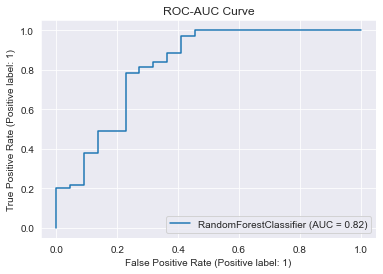

In [112]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,xtest,ytest)
plt.title('ROC-AUC Curve')
plt.show()

AUC score is 82%,so it is a good score.

In [113]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(gcv.best_estimator_,'loan_application_status.pk1')

['loan_application_status.pk1']